# Daniel Gómez Rámirez

Para esta actividad se va a evaluar un dataset para un caso real obtenido de una empresa relacionada con autobuses, por lo que se descartaran algunas columnas por criterio experto, ya que no aplican para el objetivo real que se pretende, y no afecta  al objetivo de la actividad.

In [1]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns

# para poder ver todas las columnas y filas 
pd.options.display.max_rows = 50
pd.options.display.max_columns = 60

# Carga de los datos

En el dataset taller:    
Obtenemos el error  ***"Expected 30 fields in line 76683, saw 32"***. que nos indica que hay filas con más columnas, que las columnas de la primera fila, la solución sería exportar los datos con un separación diferente a la "," o al ";". ya que hay apartados que contienen este caracter. como se han moduficado varias columnas manualmente pero sigue existiendo el error en diferentes filas, para este caso academico descartamos las lineas con este error.

In [2]:

ruta_taller=os.path.join("data",'taller_mat.csv')
taller = pd.read_csv(ruta_taller, sep=';', index_col = False, on_bad_lines='skip')


In [3]:
ruta_vehiculo=os.path.join("data",'veh_flota.csv')
vehiculo = pd.read_csv(ruta_vehiculo, sep=',', index_col = False)#, on_bad_lines='skip')
#display(vehiculo)

# Analisis Dataset TALLER

sabemos que estas columnas  tienes tipos diferentes de datos las trataremos mas adelante si es necesario, por lo que podemos deducir que hay filas que no están correctamente declaradas

In [4]:
print(taller.shape)
taller.sample(5)

(188161, 30)


,anyparte,numparte,numlinea,descrip,cantidad,precio,importe,prove mat,nomartic,fec_alta,fecultcom,preciouc,ctr_stock,ctr_serie,ctr_rueda,nomalmac,prove art,nomfamia,nommarca,nomresid,nomunida,codigbus,fechaent,numkms,fechasal,siniestro,descripcion,mecanico,mecanico ape,cliente
12048,2009,91788,3,VALVULA KNORR DX80D,1.0,475.0000,475.00,EUROPART,VALVULA KNORR DX80D,2013-02-25,2013-11-18,475.0000,1,0,0,ALMACEN QUART,EUROPART,VARIOS,SIN ASIGNAR,NaN,UNIDADES,F103,2009-04-21,723636,2009-04-24,0,NaN,NaN,NaN,FERNANBUS S.A.
123373,2019,1900629,2,LIMPIAR Y COMPROBAR INTERCOOLER,1.0,80.0000,64.00,"TERMIC XIRIVELLA, S.L.L.",LIMPIAR Y COMPROBAR INTERCOOLER,2012-11-20,2021-07-06,56.0000,0,0,0,ALMACEN QUART,"TERMIC XIRIVELLA, S.L.L.",MANO DE OBRA,SIN ASIGNAR,NaN,UNIDADES,C091,2019-01-24,696572,2019-01-28,0,"Radiador,puerta trasera",NaN,NaN,LA CONCEPCION S.L.-AUTOBUSES
138006,2019,1909075,4,MATERIAL DE PRECINTADO,1.0,12.0000,12.00,"TALLERES J.MAESO, S.L.",MATERIAL DE PRECINTADO,2011-02-07,2022-05-13,12.0000,1,0,0,ALMACEN QUART,"TALLERES J.MAESO, S.L.",VARIOS,SIN ASIGNAR,NaN,UNIDADES,H110,2019-09-26,705640,2019-09-26,0,MATERIAL-TACOGRAFO DIGITAL-,NaN,NaN,HERCA S.L.-AUTOCARES
26586,2011,112139,2,PRECINTOS VARIOS,1.0,15.0000,15.00,"TALLERES MAESO, S.L.",PRECINTOS VARIOS,2013-03-06,2019-05-13,12.0000,1,0,0,ALMACEN QUART,"TALLERES J.MAESO, S.L.",VARIOS,SIN ASIGNAR,NaN,UNIDADES,B118,2011-04-29,714341,2011-05-05,0,NaN,NaN,NaN,BUÑOL S.L.-AUTOBUSES
98940,2017,1709263,7,ABANICO LIJADOR 60 X 30 GR.60,1.0,3.5267,3.53,"FERRETERIA BOBALAR, S.L.",ABANICO LIJADOR 60 X 30 GR.60,2017-10-18,2017-10-17,3.5267,0,0,0,ALMACEN QUART,"FERRETERIA BOBALAR, S.L.",TORNILLERIA Y VARIOS,NaN,NaN,UNIDADES,F000,2017-10-18,103434,2017-10-18,0,MATERIAL VARIO,NaN,NaN,FERNANBUS S.A.


con este codigo verificabamos el numero de columnas de las filas para buscar donde habia un error en la fila, en este caso concreto, se verificó que la fila 8 y 9 debian estar en la misma fila.

In [5]:
a='2016;1603791;1;IRFB3607PBF N-MOSFET UNIPOLAR HEXFET 75V;5.00;3.5000;17.50;ELECTRONICA GIMENO S.L.;IRFB3607PBF N-MOSFET UNIPOLAR HEXFET 75V;80A;2016-05-13;2016-05-13;3.500000;1;0;0;ALMACEN QUART;ELECTRONICA GIMENO S.L.;IMAGEN Y SONIDO;;;UNIDADES;U316;2016-05-13;273287;2016-05-13;0;MATERIAL -CONECTORES, MANDO A DISTANCIA Y VENTILADOR-;;;VIAJES TRANSVIA TOURS, S.L.'
a= pd.Series(a.split(";"))
print(len(a))
a

31


0                                                  2016
1                                               1603791
2                                                     1
3              IRFB3607PBF N-MOSFET UNIPOLAR HEXFET 75V
4                                                  5.00
5                                                3.5000
6                                                 17.50
7                               ELECTRONICA GIMENO S.L.
8              IRFB3607PBF N-MOSFET UNIPOLAR HEXFET 75V
9                                                   80A
10                                           2016-05-13
11                                           2016-05-13
12                                             3.500000
13                                                    1
14                                                    0
15                                                    0
16                                        ALMACEN QUART
17                              ELECTRONICA GIME

buscamos registros duplicados y vemos que para el dataset taller hay 0

In [6]:
print(taller.duplicated().sum())

0


## Missings
buscamos  los missings para el dataset taller

In [7]:
missing_taller=taller.isna().sum()/len(taller)*100
missing_taller=pd.DataFrame(missing_taller)
missing_taller

,0
anyparte,0.000000
numparte,0.000000
numlinea,0.000000
descrip,0.000000
cantidad,0.000000
precio,0.000000
importe,0.000000
prove mat,0.314093
nomartic,0.000000
fec_alta,0.000000


In [8]:


#missing_taller['indice']=range(len(missing_taller))
#missing_taller.set_index('indice')
#missing_taller.reset_index(inplace=True)
#missing_taller = missing_taller.rename(columns = {'index':'columnas'})
#missing_taller = missing_taller.rename(columns = {0:'missings'})


creamos una función apra hacer el plot de el % missings por columna ya que lo vamsoa a aplicar a varios datasets.

In [9]:
def plot_miss(data):
    sice_x=10 if len (data) >30 else 6
    # print(len(data))
    #print(sice_x)
    sns.set_theme(style="whitegrid")
    plt.figure(figsize = (12,sice_x))
    sns.set_color_codes("muted")
    
    ax = sns.barplot( x=0, y=data.index, data=data).set(title='% de Missings por columna')
    #ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
   
    plt.xlabel('% Missings')
    plt.ylabel('Columnas')
    plt.show()
     

Mostramos de forma grafia el porcentaje de missings

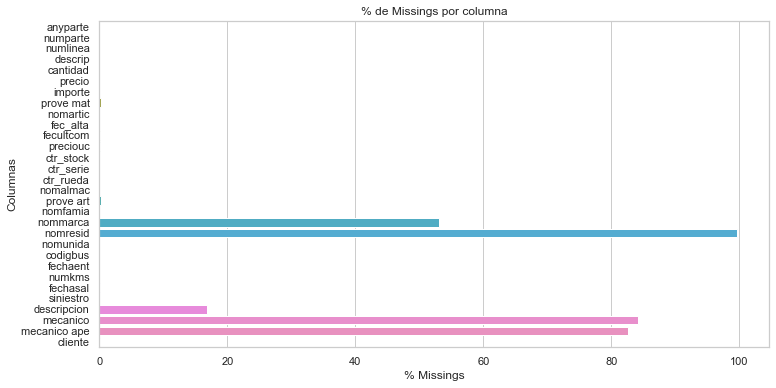

In [10]:
plot_miss(missing_taller)

consultamos lso tipos asignados por Pandas al dataframe

In [11]:
taller.dtypes

anyparte          int64
numparte          int64
numlinea          int64
descrip          object
cantidad        float64
precio          float64
importe         float64
prove mat        object
nomartic         object
fec_alta         object
fecultcom        object
preciouc        float64
ctr_stock         int64
ctr_serie         int64
ctr_rueda         int64
nomalmac         object
prove art        object
nomfamia         object
nommarca         object
nomresid         object
nomunida         object
codigbus         object
fechaent         object
numkms            int64
fechasal         object
siniestro         int64
descripcion      object
mecanico         object
mecanico ape     object
cliente          object
dtype: object

### Seleccionamos columnas
seleccionmos las columnas


In [12]:
features_taller=['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art',
       'nomfamia', 'nomunida', 'codigbus', 'fechaent',
       'numkms', 'fechasal', 'siniestro', 'descripcion','cliente']
taller= taller[features_taller]

imputar 'Sin asignar' a los missings de las columnas prove mat','prove art','cliente','descripcion'
 y 0 a la columna preciouc

In [13]:
 

taller['preciouc']=np.where((taller['preciouc'].isna()) ,0, taller['preciouc'])

columnas=['prove mat','prove art','cliente','descripcion']
for columna in columnas:
    taller[columna]=np.where((taller['prove mat'].isna()) ,'SIN ASIGNAR', taller['prove mat'])



creamos una función para poder corregir los errores, que se han visto en las columnas de fechas en  ambos datasets.    
Esta función se ha ido actualizando para los errores que se han ido encontrando    
Como vamos a trabajar con fechas importamos datetime para poder asiganar el tipo fecha.

In [14]:
from datetime import datetime, timedelta

In [15]:

def norm_fecha (columna):

    fecha = columna.str.split(pat = '-', expand = True)
    
    # verificar si 0201 es 2001 o 2021
    fechas=[
            # añadidas para el data set taller para als 3 columnas
            ['0011','2011'],['0012','2012'],['2200','2020'],
            ['1948','2018'],['3200','2020'],['2200','2020'],
            ['2201','2021'],['3011','2011'],['2301','2021'],
            ['8201','2021'],['0201','2001'],['0212','2012'],
            ['1912','2012'],['9201','2021'],['2048','2018'],
            ['2047','2017'],['2107','2017'],['2044','2011'],
            ['2029','2020'],
            #añadidas para el data set vehiculo columna 'fechamat'
            #['0',np.nan],['65','1965'],['0000',np.nan],
            #['63','1963'],['59','1959'],['23','2022'],
            #['54','1954'],['0001','2001'],
        
            ['0',np.nan],['65',np.nan],['0000',np.nan],
            ['63',np.nan],['59',np.nan],['23',np.nan],
            ['54',np.nan],['0001','2001'],
            #añadidas para el data set vehiculo columna 'matriculacion_planner'
            ['34',np.nan],['19',np.nan],['43',np.nan],
            ['24',np.nan],['39',np.nan],['40',np.nan],
            ['55',np.nan],['25',np.nan],['50',np.nan],
            ['35',np.nan],['22',np.nan],['71',np.nan],
            ['53',np.nan],['61',np.nan],['47',np.nan],
            ['15',np.nan],['31',np.nan],['8',np.nan],
            ['12',np.nan],['9',np.nan],['18',np.nan],
            ['13',np.nan],['28',np.nan],['56',np.nan],
            ['26',np.nan],['4',np.nan],['5',np.nan]

           ]
    
    for f,f1 in fechas:
        fecha[0]=np.where((fecha[0]==f) ,f1, fecha[0])

    
    colum_fecha=fecha[0]+'-'+fecha[1]+'-'+fecha[2]     
    fecha_year=pd.unique(fecha[0])
    return  colum_fecha, fecha_year, fecha[0]


def cuentaNAN(fecha_a):
    fecha_b=pd.DataFrame(fecha_a[:1])
    fecha_b = fecha_b.transpose()
    print('Fechas')
    print(f'cantidad de registros: {fecha_b.count()}')
    print(f'cantidad de MISSINGS: {fecha_b.isna().sum()}')
    print(f'Porcentaje de MISSINGS: {fecha_b.isna().sum()/len(fecha_b)*100}')

verificamos los valores unicos de las columnas, fechas, pudiendo añadir los valores atipicos a la lista fechas de la función anterior

In [16]:
fecha_a= norm_fecha(taller['fec_alta'])
fecha_a[1]

array(['2012', '2010', '2009', '2011', '2007', '2008', '2013', '2019',
       '2006', '2020', '2021', '2001', '2018', '2014', '2017', '2015',
       '2016', '2005', '2004', '2003', '2022'], dtype=object)

In [17]:
cuentaNAN(fecha_a)

Fechas
cantidad de registros: 0    188161
dtype: int64
cantidad de MISSINGS: 0    0
dtype: int64
Porcentaje de MISSINGS: 0    0.0
dtype: float64


In [18]:
taller['fec_alta']=fecha_a[0]
taller['fec_alta'] = pd.to_datetime(taller['fec_alta'], format='%Y-%m-%d')

In [19]:
fecha_a= norm_fecha(taller['fecultcom'])
fecha_a[1]

array(['2020', '2010', '2022', '2017', '2019', '2011', '2007', '2021',
       '2009', '2015', '2018', '2008', '2013', '2016', '2012', '2014',
       '2006', nan, '2001', '2005', '2004'], dtype=object)

In [20]:
cuentaNAN(fecha_a)

Fechas
cantidad de registros: 0    187951
dtype: int64
cantidad de MISSINGS: 0    210
dtype: int64
Porcentaje de MISSINGS: 0    0.111607
dtype: float64


In [21]:
taller['fecultcom']=fecha_a[0]
taller['fecultcom'] = pd.to_datetime(taller['fecultcom'], format='%Y-%m-%d')

In [22]:
fecha_a= norm_fecha(taller['fechasal'])
fecha_a[1]

array(['2007', '2008', '2013', '2009', '2010', '2011', '2012', nan,
       '2014', '2021', '2015', '2016', '2017', '2018', '2019', '2020',
       '2022'], dtype=object)

In [23]:
cuentaNAN(fecha_a)

Fechas
cantidad de registros: 0    188044
dtype: int64
cantidad de MISSINGS: 0    117
dtype: int64
Porcentaje de MISSINGS: 0    0.062181
dtype: float64


In [24]:
taller['fechasal']=fecha_a[0]
taller['fechasal'] = pd.to_datetime(taller['fechasal'], format='%Y-%m-%d')

In [25]:
fecha_a= norm_fecha(taller['fechaent'])
fecha_a[1]

array(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

In [26]:
cuentaNAN(fecha_a)

Fechas
cantidad de registros: 0    188161
dtype: int64
cantidad de MISSINGS: 0    0
dtype: int64
Porcentaje de MISSINGS: 0    0.0
dtype: float64


In [27]:
taller['fechaent']=fecha_a[0]
taller['fechaent'] = pd.to_datetime(taller['fechaent'], format='%Y-%m-%d')

In [28]:
#taller['anyparte'] = pd.to_datetime(taller['anyparte'], format='%Y')

In [29]:
taller.dtypes


anyparte                int64
numparte                int64
numlinea                int64
descrip                object
cantidad              float64
precio                float64
importe               float64
prove mat              object
nomartic               object
fec_alta       datetime64[ns]
fecultcom      datetime64[ns]
preciouc              float64
ctr_stock               int64
nomalmac               object
prove art              object
nomfamia               object
nomunida               object
codigbus               object
fechaent       datetime64[ns]
numkms                  int64
fechasal       datetime64[ns]
siniestro               int64
descripcion            object
cliente                object
dtype: object

In [30]:
fechas=taller.select_dtypes(include=np.datetime64)

col_date_taller=taller.select_dtypes(include=np.datetime64).columns.tolist()
col_date_taller


['fec_alta', 'fecultcom', 'fechaent', 'fechasal']

In [31]:
taller.isna().sum()/len(taller)*100

anyparte       0.000000
numparte       0.000000
numlinea       0.000000
descrip        0.000000
cantidad       0.000000
precio         0.000000
importe        0.000000
prove mat      0.000000
nomartic       0.000000
fec_alta       0.000000
fecultcom      0.111607
preciouc       0.000000
ctr_stock      0.000000
nomalmac       0.000000
prove art      0.000000
nomfamia       0.000000
nomunida       0.000000
codigbus       0.000000
fechaent       0.000000
numkms         0.000000
fechasal       0.062181
siniestro      0.000000
descripcion    0.000000
cliente        0.000000
dtype: float64

In [32]:
taller.columns

Index(['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art', 'nomfamia', 'nomunida',
       'codigbus', 'fechaent', 'numkms', 'fechasal', 'siniestro',
       'descripcion', 'cliente'],
      dtype='object')

## Correlaciones
Creamos una función que  muestre las correlaciones ya que mas adelante la usaremos otra vez.

In [33]:
def correlaciones(df):
    sice_x=15 if len (df.columns) >30 else 10
    sice_y=10 if len (df.columns) >30 else 6
    plt.figure(figsize=(sice_x,  sice_y))
    # define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    heatmap = sns.heatmap(round(df.corr(),2), mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
    heatmap.set_title('Triangulo de Correlaciones Heatmap', fontdict={'fontsize':18}, pad=16)

mostramos las correlaciones que hay en el dataset taller

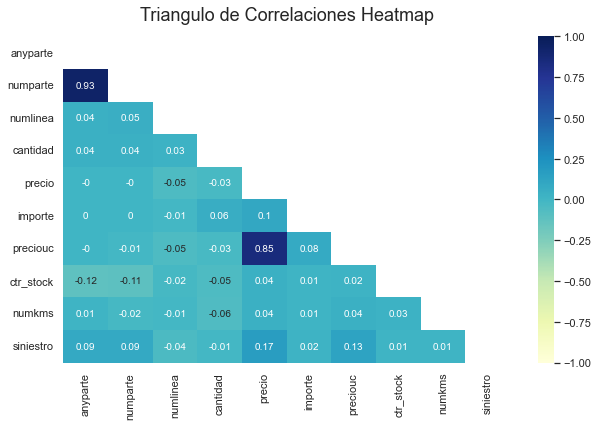

In [34]:
correlaciones(taller)

se peud eevr que las correlaciones mas destacables apra etse data set son  numparte con anyparte y precio con preciouc

Verificamos valores unicos para algunas de las columnas

In [35]:
pd.unique(taller['ctr_stock'])

array([0, 1])

In [36]:
pd.unique(taller['anyparte'])

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022])

In [37]:
pd.unique(taller['siniestro'])

array([0, 1])

## Relaciones entre pares de variables

In [38]:
#sns.pairplot(taller, hue='nomfamia')
#plt.show()

# Analisis Dataset VEHICULOS

In [39]:
print(vehiculo.shape)
vehiculo.sample(5)


(1532, 38)


,id_vehiculo,codigbus,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,bastidor,capacidad,paxdepie,paxsentados,paxpmr,plat_pmr,WC,autoport,marca,modelo,carrocero,categoria,clase,longitud,numcv,tara,cilindrada,potencia,nvl_emisiones,escolar,tipo,subtipo,uso,tall_kilom,tal_feckm,totkilom,activo,dns_vehiculo,dispositivo,combustible
1204,1085.0,ESC0340,3987GSX,2010-01-20,2010-01-20,12.0,57,Escartin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
817,NaN,INDUSAUTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMBULANCIA TIPO B,SVB,BASIC_FLEET,NaN,2022-05-12 00:00:00,153236,1,ambulancias,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,651.0,20063,5396HGM,2011-10-03,2011-10-03,10.0,93,Ambulancias Edetanas,VF6MFFECC44391465,9,0,9,0,NaN,NaN,NaN,RENAULT,MASTER,SIN ASIGNAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMBULANCIA TIPO A,TNA A2,BASIC_FLEET,NaN,2021-05-20 00:00:00,559772.0,1.0,ambulancias,NaN,NaN
1307,1186.0,T251,1247FLH,2007-02-14,2007-02-14,15.0,2,Transvia,ZGA7B2P000E003145,58,0,37,5,NaN,NaN,NaN,IVECO,EURORI.C-35 A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL,57 Plazas,NaN,498910.0,2017-12-18 00:00:00,1543386.0,1.0,transvia,NaN,NaN
1276,1155.0,576B,9365LBL,2019-09-30,2019-09-30,3.0,19,Empleadas de Hogar,SB1Z93BE10E060982,5,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURISMO,NaN,DISCRECIONAL,NaN,NaN,0.0,1.0,transvia,NaN,NaN


Buscamos duplicados y los eliminamos

In [40]:
print(vehiculo.duplicated().sum())

34


In [41]:
vehiculo=vehiculo.drop_duplicates()

In [42]:
print(vehiculo.duplicated().sum())

0


## Missing
observamos los missings y los graficamos

In [43]:
missing_vehiculo=vehiculo.isna().sum()/len(taller)*100
missing_vehiculo=pd.DataFrame(missing_vehiculo)
missing_vehiculo

,0
id_vehiculo,0.057398
codigbus,0.006909
matricul,0.013818
fechamat,0.069621
matriculacion_planner,0.075999
edad,0.080782
numempre,0.048894
nomempre,0.053146
bastidor,0.193451
capacidad,0.214178


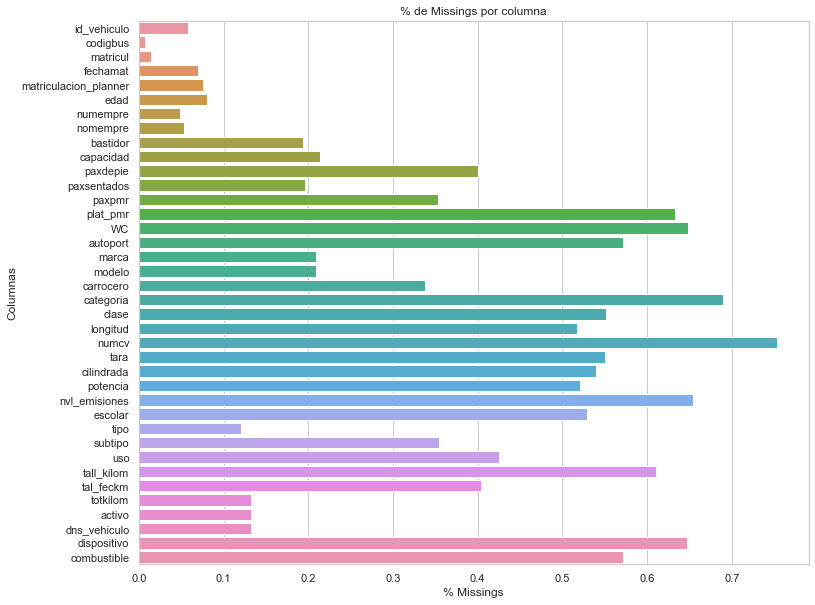

In [44]:
plot_miss(missing_vehiculo)

vemos los tipos  que asignado pandas a cada columna

In [45]:
vehiculo.dtypes

id_vehiculo              float64
codigbus                  object
matricul                  object
fechamat                  object
matriculacion_planner     object
edad                     float64
numempre                  object
nomempre                  object
bastidor                  object
capacidad                 object
paxdepie                  object
paxsentados               object
paxpmr                    object
plat_pmr                  object
WC                        object
autoport                  object
marca                     object
modelo                    object
carrocero                 object
categoria                 object
clase                     object
longitud                  object
numcv                     object
tara                      object
cilindrada                object
potencia                  object
nvl_emisiones             object
escolar                   object
tipo                      object
subtipo                   object
uso       

### Seleccion de columnas

elegimos las caracteristicas que nos interesan

In [46]:
vehiculo.columns

Index(['id_vehiculo', 'codigbus', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'bastidor',
       'capacidad', 'paxdepie', 'paxsentados', 'paxpmr', 'plat_pmr', 'WC',
       'autoport', 'marca', 'modelo', 'carrocero', 'categoria', 'clase',
       'longitud', 'numcv', 'tara', 'cilindrada', 'potencia', 'nvl_emisiones',
       'escolar', 'tipo', 'subtipo', 'uso', 'tall_kilom', 'tal_feckm',
       'totkilom', 'activo', 'dns_vehiculo', 'dispositivo', 'combustible'],
      dtype='object')

In [47]:
features_vehiculos=['id_vehiculo', 'codigbus', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 
       'marca', 'modelo', 'carrocero','tipo',
       'totkilom', 'dns_vehiculo']

In [48]:
vehiculo= vehiculo[features_vehiculos]

eliminar  missings de id vehiculo, y codigbus , e imputar 'sin asignar' al resto

In [49]:
#vehiculo = vehiculo.dropna(subset=['codigbus'])
vehiculo = vehiculo[vehiculo['codigbus'].notna()]
vehiculo = vehiculo[vehiculo['id_vehiculo'].notna()]
#vehiculo = vehiculo[vehiculo[['id_vehiculo','codigbus']].notna()]

In [50]:
pd.unique(vehiculo['numempre'])

array(['3', '19', '2', '31', '4', '6', '10', '17', '15', '8', '16', '43',
       '45', '44', '46', '47', '67', '69', '70', '68', '57', '72', '79',
       '80', '83', '84', '93', '92', '94', '96', '95', '97', '120', '121',
       '117', '138', '135', '139', '140'], dtype=object)

In [51]:
vehiculo.shape

(1390, 14)

In [52]:
vehiculo.dtypes

id_vehiculo              float64
codigbus                  object
matricul                  object
fechamat                  object
matriculacion_planner     object
edad                     float64
numempre                  object
nomempre                  object
marca                     object
modelo                    object
carrocero                 object
tipo                      object
totkilom                 float64
dns_vehiculo              object
dtype: object

asiganamos el valor -1 para los missings de 'edad', 'numempre', 'totkilom'

asiganamos el 'sin registro' para los missings de 'matricul','nomempre', 'marca','modelo', 'carrocero', 'tipo', 'dns_vehiculo'

In [53]:
#vehiculo['id_vehiculo']=np.where((vehiculo['id_vehiculo'].isna()) ,0, vehiculo['id_vehiculo'])

columnas=[ 'edad', 'numempre', 'totkilom']
for columna in columnas : 
    vehiculo[columna]=np.where((vehiculo[columna].isna()) ,-1, vehiculo[columna])

#palabras=['ZARAG','Si','No']
#for palabra in palabras:
#    vehiculo['numempre']=np.where((vehiculo['numempre'].str.contains(palabra)) ,-1, vehiculo['numempre'])
#vehiculo['numempre'] = vehiculo['numempre'].astype(float)

columnas=[ 'matricul','nomempre', 'marca','modelo', 'carrocero', 'tipo', 'dns_vehiculo']
for columna in columnas :   
    vehiculo[columna]=np.where((vehiculo[columna].isna()) ,'SIN ASIGNAR', vehiculo[columna])


In [54]:
vehiculo.columns

Index(['id_vehiculo', 'codigbus', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'marca',
       'modelo', 'carrocero', 'tipo', 'totkilom', 'dns_vehiculo'],
      dtype='object')

comprobamos valores unicos, que tengan sentido

In [55]:
pd.unique(vehiculo['edad'])

array([ 3.,  6.,  5.,  7., 14.,  8., 18., 12., 19., -1., 16., 13.,  9.,
        4., 11., 10., 29., 20., 32., 30., 73., 64., 44., 43., 22., 17.,
       15., 31., 25., 38., 27., 42., 39., 63., 21., 34., 28., 24.,  2.,
        1., 26., 23.,  0., 37., 40.])

In [56]:
vehiculo.isna().sum()/len(taller)*100

id_vehiculo              0.000000
codigbus                 0.000000
matricul                 0.000000
fechamat                 0.054740
matriculacion_planner    0.064307
edad                     0.000000
numempre                 0.000000
nomempre                 0.000000
marca                    0.000000
modelo                   0.000000
carrocero                0.000000
tipo                     0.000000
totkilom                 0.000000
dns_vehiculo             0.000000
dtype: float64

vemos que hay matriculas que no correspondenal formato de una matricula y que hay matriculas de diferentes formatos

In [57]:
vehiculo['matricul'].tail(30)

1502    6269KLH
1503    5791KLS
1504    3252KRB
1505        FVL
1506    7371LXF
1507    7122LXD
1508    8440CBC
1509    7238GYM
1510    8456HKM
1511    3459HRG
1512    2533HMG
1513    7794DXW
1514    2535HMG
1515    3277HMG
1516      RIZAO
1517    5290BKY
1518    6583FDL
1519    6792GTW
1520    7156FYC
1521    1663GZJ
1522    6652JVL
1523    5791KLS
1524    7156FYC
1525    4794JJH
1526    7140LYB
1527    6312FZT
1528    1694HNR
1529    8156JWS
1530    1983HST
1531    7140LYB
Name: matricul, dtype: object

creamos un filtro que deja las matricuals  que son alfanumericas en las posiciones designadas que coinciden con los dos tipos de formatos de matricula que se ha visto en el datase

tipo 1 : X0000XX    
tipo 2 : 0000XXX

In [58]:
vehiculo['matricul']=np.where((vehiculo['matricul'].str[1:-3].str.isnumeric() & 
                               vehiculo['matricul'].str[-2:].str.isalpha())
                              ,vehiculo['matricul'],'SIN ASIGNAR')

In [59]:
vehiculo['matricul'].tail(30)

1502        6269KLH
1503        5791KLS
1504        3252KRB
1505    SIN ASIGNAR
1506        7371LXF
1507        7122LXD
1508        8440CBC
1509        7238GYM
1510        8456HKM
1511        3459HRG
1512        2533HMG
1513        7794DXW
1514        2535HMG
1515        3277HMG
1516    SIN ASIGNAR
1517        5290BKY
1518        6583FDL
1519        6792GTW
1520        7156FYC
1521        1663GZJ
1522        6652JVL
1523        5791KLS
1524        7156FYC
1525        4794JJH
1526        7140LYB
1527        6312FZT
1528        1694HNR
1529        8156JWS
1530        1983HST
1531        7140LYB
Name: matricul, dtype: object

pasamos la función anteriormente creada para las columnas de fechas, añadiendo a la lista las fechas que corresponda 

In [60]:
fecha_a= norm_fecha(vehiculo['fechamat'])
fecha_a[1]

array(['2019', '2016', '2017', '2015', '2008', '2014', '2004', '2010',
       '2003', nan, '2006', '2009', '2013', '2018', '2011', '2012',
       '1993', '2002', '1990', '1992', '1949', '1958', '1978', '1979',
       '2000', '2001', '2005', '2007', '1991', '1997', '1984', '1995',
       '1980', '1983', '1959', '1988', '1994', '1998', '2020', '1996',
       '1999', '2021', '1985', '1982', '2022'], dtype=object)

In [61]:
cuentaNAN(fecha_a)    

Fechas
cantidad de registros: 0    1286
dtype: int64
cantidad de MISSINGS: 0    104
dtype: int64
Porcentaje de MISSINGS: 0    7.482014
dtype: float64


asignamos los valores modificados a la columna de fecha y le asignamos el typo fecha

In [62]:
vehiculo['fechamat']=fecha_a[0]
vehiculo['fechamat'] = pd.to_datetime(vehiculo['fechamat'], format='%Y-%m-%d')

In [63]:
pd.unique(vehiculo['numempre'])

array(['3', '19', '2', '31', '4', '6', '10', '17', '15', '8', '16', '43',
       '45', '44', '46', '47', '67', '69', '70', '68', '57', '72', '79',
       '80', '83', '84', '93', '92', '94', '96', '95', '97', '120', '121',
       '117', '138', '135', '139', '140'], dtype=object)

In [64]:
fecha_a= norm_fecha(vehiculo['matriculacion_planner'])
fecha_a[1]

array(['2019', '2016', '2017', '2015', '2008', '2014', '2004', '2010',
       '2003', nan, '2006', '2009', '2013', '2018', '2011', '2012',
       '1993', '2002', '1990', '1992', '1949', '1958', '1978', '1979',
       '2000', '2005', '2007', '1991', '1997', '1984', '1995', '1980',
       '1983', '1959', '2001', '1988', '1994', '1998', '2020', '1996',
       '1999', '2021', '1985', '1982', '2022'], dtype=object)

In [65]:
cuentaNAN(fecha_a) 

Fechas
cantidad de registros: 0    1269
dtype: int64
cantidad de MISSINGS: 0    121
dtype: int64
Porcentaje de MISSINGS: 0    8.705036
dtype: float64


asignamos los valores modificados a la columna de fecha y le asignamos el typo fecha

In [66]:
vehiculo['matriculacion_planner']=fecha_a[0]
vehiculo['matriculacion_planner'] = pd.to_datetime(vehiculo['matriculacion_planner'], format='%Y-%m-%d')

In [67]:
fechas=vehiculo.select_dtypes(include=np.datetime64)

col_date=vehiculo.select_dtypes(include=np.datetime64).columns.tolist()
col_date

['fechamat', 'matriculacion_planner']

comprobamos que los tipos son lso correctos

In [68]:
vehiculo.dtypes

id_vehiculo                     float64
codigbus                         object
matricul                         object
fechamat                 datetime64[ns]
matriculacion_planner    datetime64[ns]
edad                            float64
numempre                         object
nomempre                         object
marca                            object
modelo                           object
carrocero                        object
tipo                             object
totkilom                        float64
dns_vehiculo                     object
dtype: object

In [69]:
vehiculo.isna().sum()/len(taller)*100

id_vehiculo              0.000000
codigbus                 0.000000
matricul                 0.000000
fechamat                 0.055272
matriculacion_planner    0.064307
edad                     0.000000
numempre                 0.000000
nomempre                 0.000000
marca                    0.000000
modelo                   0.000000
carrocero                0.000000
tipo                     0.000000
totkilom                 0.000000
dns_vehiculo             0.000000
dtype: float64

In [70]:
vehiculo.sample(5)

,id_vehiculo,codigbus,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,marca,modelo,carrocero,tipo,totkilom,dns_vehiculo
578,488.0,G054,1359BJC,2001-05-02,2001-05-02,21.0,72,La Marina Gandiense,SCANIA,CS40 CITY II,CASTROSUA,Urbano,2819351.0,lamarina
447,374.0,X114,0530GBG,2008-02-22,2008-02-22,14.0,47,Starbus,MAN,LION'S TOP COACH,MAN,Discrecional,2757875.0,bunyol
768,678.0,20094,5736KKY,2018-05-17,2018-05-17,4.0,93,Ambulancias Edetanas,FORD,TRANSIT,INDUSAUTO,AMBULANCIA TIPO A,274970.0,ambulancias
1153,1043.0,RLL09,0081KWC,2019-04-05,2019-04-05,3.0,2,Transvia,OPEL,CORSA,SIN ASIGNAR,TURISMO,0.0,transvia
1318,1197.0,E653,5396JXT,2017-03-27,2017-03-27,5.0,10,Autos Diamond,FORD,MONDEO BA7,SIN ASIGNAR,TURISMO,1101550.0,transvia


comprobamos las correlaciones que hay en el data set vehiculo, vemos que no son muy altes

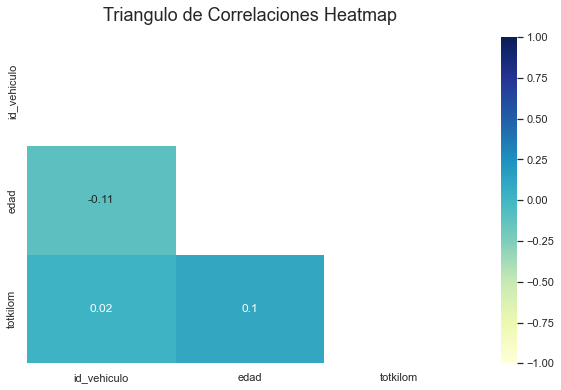

In [71]:
correlaciones(vehiculo)

# Combinar Datasets

comprobamos que las columnas por las que vamos a juntar los data sets  tienen valores iguales

In [72]:
codigbus_taller = pd.unique(taller['codigbus'])
print(len(codigbus_taller))
print(type(codigbus_taller))

1319
<class 'numpy.ndarray'>


In [73]:
codigbus_vehiculo = pd.unique(vehiculo['codigbus'])
print(len(codigbus_vehiculo))

1373


In [74]:
print(codigbus_taller)
print(codigbus_vehiculo)

['B078' 'B128' 'B131' ... 'N010' 'LSR0093' 'SEL374']
['1000' '1001' '1002' ... 'T380' 'B191' 'R104']


In [75]:
codigbus_taller=pd.Series(codigbus_taller)
codigbus_taller.isna().sum()

0

In [76]:
codigbus_vehiculo=pd.Series(codigbus_vehiculo)
codigbus_vehiculo.isna().sum()

0

In [77]:
#codigbus_vehiculo=codigbus_vehiculo.dropna()
#codigbus_vehiculo.isna().sum()

In [78]:
codigbus_comun=np.intersect1d(codigbus_taller,codigbus_vehiculo)
codigbus_comun

array(['20052', '20063', '222', '236', '23LT', '30178', '30185', '30252',
       '30295', '54HC', '58HC', '61HC', '63HC', '63LT', '66LT', '67HC',
       '69HC', '70HC', '71HC', '72HC', '73HC', '75HC', '76HC', '77HC',
       '78HC', '79HC', '80HC', '81HC', '82HC', '83HC', '84HC', 'A102',
       'A107', 'A109', 'A110', 'A114', 'A115', 'A124', 'A125', 'A358',
       'B009', 'B011', 'B114', 'B116', 'B117', 'B119', 'B127', 'B129',
       'B130', 'B132', 'B133', 'B135', 'B137', 'B145', 'B146', 'B148',
       'B150', 'B152', 'B153', 'B155', 'B156', 'B158', 'B160', 'B161',
       'B162', 'B164', 'B165', 'B166', 'B168', 'B169', 'B170', 'B171',
       'B172', 'B173', 'B174', 'B175', 'B176', 'B177', 'B178', 'B179',
       'B180', 'B181', 'B182', 'B183', 'B184', 'B185', 'B186', 'B187',
       'B188', 'B189', 'C084', 'C086', 'C087', 'C088', 'C091', 'C092',
       'C094', 'C095', 'C098', 'C099', 'C101', 'C102', 'C103', 'C104',
       'C105', 'C106', 'C107', 'C108', 'C109', 'D101', 'D112', 'D113',
  

comprobamos que las columnas por las que vamos a juntar los data sets  tienes valores iguales

vemos que el número de observaciones comunes:

In [112]:
#len(np.intersect1d(codigbus_taller,codigbus_vehiculo))
len(codigbus_comun)

472

In [80]:
taller.columns

Index(['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art', 'nomfamia', 'nomunida',
       'codigbus', 'fechaent', 'numkms', 'fechasal', 'siniestro',
       'descripcion', 'cliente'],
      dtype='object')

In [81]:
vehiculo.columns

Index(['id_vehiculo', 'codigbus', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'marca',
       'modelo', 'carrocero', 'tipo', 'totkilom', 'dns_vehiculo'],
      dtype='object')

hacemos un inner join  para tener las filas con toda la información

In [82]:
#df= taller.merge(vehiculo, how='left', on='codigbus')
df= taller.merge(vehiculo, how='inner', on='codigbus')
print(df.shape)



(98516, 37)


In [83]:
df.columns

Index(['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art', 'nomfamia', 'nomunida',
       'codigbus', 'fechaent', 'numkms', 'fechasal', 'siniestro',
       'descripcion', 'cliente', 'id_vehiculo', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'marca',
       'modelo', 'carrocero', 'tipo', 'totkilom', 'dns_vehiculo'],
      dtype='object')

In [84]:
df.sample(5)

,anyparte,numparte,numlinea,descrip,cantidad,precio,importe,prove mat,nomartic,fec_alta,fecultcom,preciouc,ctr_stock,nomalmac,prove art,nomfamia,nomunida,codigbus,fechaent,numkms,fechasal,siniestro,descripcion,cliente,id_vehiculo,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,marca,modelo,carrocero,tipo,totkilom,dns_vehiculo
51631,2014,147160,22,PARABRISAS DEL ST.VERDE,1.0,1077.20,1077.20,"BEULAS, S.A.U",PARABRISAS DEL ST.VERDE,2010-09-23,2021-04-27,1543.100,1,ALMACEN QUART,"BEULAS, S.A.U",LUNAS,UNIDADES,T297,2014-10-27,367237,2014-11-07,0,"BEULAS, S.A.U","BEULAS, S.A.U",207.0,5548GDW,2008-05-26,2008-05-26,14.0,2,Transvia,IVECO,MIDI STAR,BEULAS,Discrecional,2666114.0,transvia
61162,2018,1800359,3,INSERO ACEITE MOTOR CON JUNTA,1.0,30.14,19.59,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",INSERO ACEITE MOTOR CON JUNTA,2014-12-12,2022-05-12,16.434,1,ALMACEN QUART,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",FILTROS,UNIDADES,G069,2018-01-17,309331,2018-01-17,0,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL","MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",490.0,4706GSF,2009-12-07,2009-12-07,13.0,72,La Marina Gandiense,MAN,CITTOUR,NOGE,Urbano,2398265.0,lamarina
659,2018,1809156,1,RETROALARMA ASR102 12/24V 102DB,1.0,38.77,38.77,"VIFRAN AUTOMOCION, S.A.",RETROALARMA ASR102 12/24V 102DB,2015-04-22,2020-01-07,38.770,1,ALMACEN QUART,"VIFRAN AUTOMOCION, S.A.",MATERIAL ELECTRICO,UNIDADES,X111,2018-09-25,827750,2018-09-26,0,"VIFRAN AUTOMOCION, S.A.","VIFRAN AUTOMOCION, S.A.",373.0,0589DJK,2005-04-14,2007-03-22,15.0,47,Starbus,MAN,PLATINUM,AYATS,Discrecional,2836769.0,bunyol
20339,2013,135385,2,ROTULOS EN VINILO TINTADO CRISTAL PUERTA,1.0,55.00,55.00,MCCOLOR SUMINISTROS GENERALES DE PINTUR,ROTULOS EN VINILO TINTADO CRISTAL PUERTA,2013-10-03,2017-10-10,90.000,1,ALMACEN QUART,MCCOLOR SUMINISTROS GENERALES DE PINTUR,MATERIAL PINTURA,UNIDADES,T251,2013-10-03,328661,2013-10-03,0,MCCOLOR SUMINISTROS GENERALES DE PINTUR,MCCOLOR SUMINISTROS GENERALES DE PINTUR,1186.0,1247FLH,2007-02-14,2007-02-14,15.0,2,Transvia,IVECO,EURORI.C-35 A,SIN ASIGNAR,NORMAL,1543386.0,transvia
60376,2018,1809205,1,RESORTE BUTACA ERGOS 300N,1.0,26.00,20.80,"ATLAS BUS, S.L.",RESORTE BUTACA ERGOS 300N,2014-07-29,2020-03-09,20.800,1,ALMACEN QUART,"ATLAS BUS, S.L.",CARROCERIA,UNIDADES,B155,2018-09-26,79595,2018-09-26,0,"ATLAS BUS, S.L.","ATLAS BUS, S.L.",293.0,5724DJH,2005-04-12,2005-04-12,17.0,43,Buñol,MERCEDES BENZ,DCR,OBRADORS,Discrecional,2090295.0,bunyol


comprobamos duplicados, aunque no debería haber ya que se ha comprobado en los dataset que hemos juntado

In [85]:
print(df.duplicated().sum())

0


In [86]:
#df.isna().sum()/len(df)*100
missings_df=pd.DataFrame(df.isna().sum()/len(df)*100)
missings_df

,0
anyparte,0.000000
numparte,0.000000
numlinea,0.000000
descrip,0.000000
cantidad,0.000000
precio,0.000000
importe,0.000000
prove mat,0.000000
nomartic,0.000000
fec_alta,0.000000


In [87]:
df.isna().sum().sum()

8398

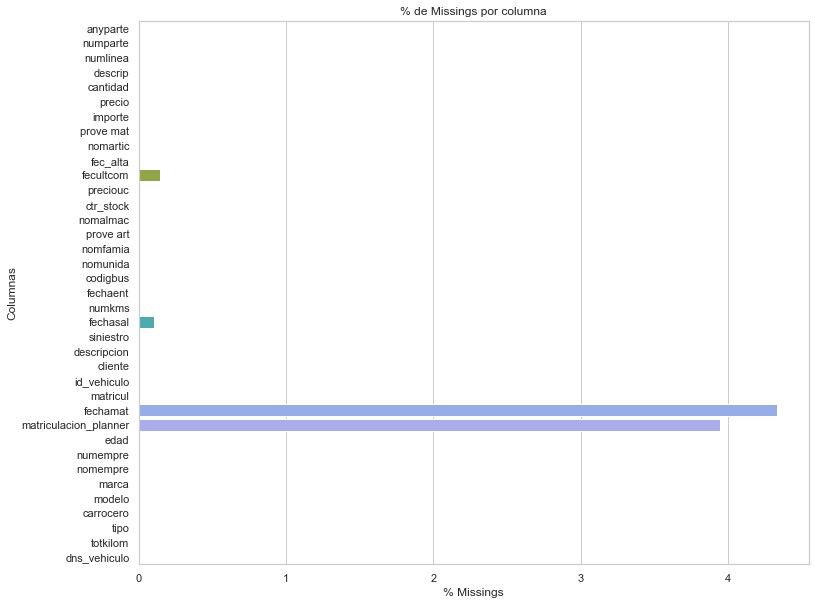

In [88]:
plot_miss(missings_df)

In [89]:
col_date=df.select_dtypes(include=np.datetime64).columns.tolist()
col_date

['fec_alta',
 'fecultcom',
 'fechaent',
 'fechasal',
 'fechamat',
 'matriculacion_planner']

eliminamos las filas con Missings en la fecha

In [90]:
df= df.dropna(axis=0)#subset=['codigbus'])
print(df.isna().sum().sum())

0


In [91]:
df.shape

(94011, 37)

In [92]:
df.columns

Index(['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art', 'nomfamia', 'nomunida',
       'codigbus', 'fechaent', 'numkms', 'fechasal', 'siniestro',
       'descripcion', 'cliente', 'id_vehiculo', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'marca',
       'modelo', 'carrocero', 'tipo', 'totkilom', 'dns_vehiculo'],
      dtype='object')

In [93]:
df.sample(10)

,anyparte,numparte,numlinea,descrip,cantidad,precio,importe,prove mat,nomartic,fec_alta,fecultcom,preciouc,ctr_stock,nomalmac,prove art,nomfamia,nomunida,codigbus,fechaent,numkms,fechasal,siniestro,descripcion,cliente,id_vehiculo,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,marca,modelo,carrocero,tipo,totkilom,dns_vehiculo
81943,2018,1800832,7,CLAVIJA REMOLQUE 12V,1.0,6.43,6.43,"VIFRAN AUTOMOCION, S.A.",CLAVIJA REMOLQUE 12V,2015-06-05,2018-02-07,6.430,1,ALMACEN QUART,"VIFRAN AUTOMOCION, S.A.",MATERIAL ELECTRICO,UNIDADES,U330,2018-01-30,5,2018-03-15,0,"VIFRAN AUTOMOCION, S.A.","VIFRAN AUTOMOCION, S.A.",265.0,SIN ASIGNAR,1998-07-09,1998-07-09,24.0,3,Viajes Transvia,ERB,TREN TURISTICO,SIN ASIGNAR,TREN TURISTICO,500.0,transvia
93690,2021,2102694,3,295/80R22.5 KMAX S G2 HL 154/149M 3PSF,2.0,280.52,561.04,"GOODYEAR DUNLOP TIRES OPERATIONS, S.A.",295/80R22.5 KMAX S G2 HL 154/149M 3PSF,2019-09-03,2022-04-21,297.350,1,ALMACEN QUART,"GOODYEAR DUNLOP TIRES OPERATIONS, S.A.",CUBIERTAS,UNIDADES,S090,2021-02-05,192543,2021-02-05,0,"GOODYEAR DUNLOP TIRES OPERATIONS, S.A.","GOODYEAR DUNLOP TIRES OPERATIONS, S.A.",642.0,5385KVS,2019-03-28,2019-03-28,3.0,84,La Serranica,DAF,i6 13.37,IRIZAR,Discrecional,352046.0,laserranica
54321,2020,2006531,3,FILTRO GASOIL MB ACTROS,1.0,9.30,9.30,"RS TURIA, S.L.",FILTRO GASOIL MB ACTROS,2017-09-22,2022-05-06,11.450,1,ALMACEN QUART,"RS TURIA, S.L.",FILTROS,UNIDADES,H111,2020-10-05,500,2020-10-06,0,"RS TURIA, S.L.","RS TURIA, S.L.",355.0,7285GBC,2008-02-20,2008-02-20,14.0,44,Herca,MERCEDES BENZ,TOURISMO RHD,MERCEDES BENZ,Discrecional,2897547.0,bunyol
44839,2015,1507612,2,EJE LIMPIA DERECHO,1.0,46.88,46.88,"VIFRAN AUTOMOCION, S.A.",EJE LIMPIA DERECHO,2011-10-31,2015-10-01,46.880,1,ALMACEN QUART,"VIFRAN AUTOMOCION, S.A.",CARROCERIA,UNIDADES,U284,2015-10-13,300948,2015-10-14,0,"VIFRAN AUTOMOCION, S.A.","VIFRAN AUTOMOCION, S.A.",1182.0,4988GVR,2010-04-14,2010-04-14,12.0,3,Viajes Transvia,MAN,SIN ASIGNAR,SIN ASIGNAR,MICROBUS,1485443.0,transvia
22728,2012,125405,1,TERMOSENSOR,1.0,142.18,106.64,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",TERMOSENSOR,2013-01-15,2018-11-22,136.670,1,ALMACEN QUART,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",VARIOS,UNIDADES,54HC,2012-09-14,703611,2012-09-19,0,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL","MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",852.0,3082CRX,2004-02-04,2004-02-04,17.0,96,La Hispano Chelvana,MAN,TOURING II,NOGE,Discrecional,2149980.0,fernanbus
55173,2020,2002614,1,PORTES,1.0,10.92,10.92,DHL EXPRES,PORTES,2013-03-07,2022-05-18,225.000,1,ALMACEN QUART,DHL EXPRES,VARIOS,UNIDADES,H109,2020-03-11,762620,2020-03-11,0,DHL EXPRES,DHL EXPRES,985.0,7375FLF,2007-02-12,2007-02-12,15.0,44,Herca,SCANIA,HABIT,TATA HISPANO,Urbano,2705262.0,bunyol
84192,2020,2005359,4,EQULIBRADO DINÁMICO,1.0,5.00,5.00,"GOODYEAR DUNLOP TIRES OPERATIONS, S.A.",EQULIBRADO DINÁMICO,2016-08-05,2022-05-29,15.450,0,ALMACEN QUART,"GOODYEAR DUNLOP TIRES OPERATIONS, S.A.",MANO DE OBRA,UNIDADES,T336,2020-08-19,225806,2020-08-20,0,"GOODYEAR DUNLOP TIRES OPERATIONS, S.A.","GOODYEAR DUNLOP TIRES OPERATIONS, S.A.",223.0,1325KDM,2017-10-05,2017-10-05,5.0,2,Transvia,MERCEDES BENZ,SPICA,MERCEDES BENZ,Discrecional,1089626.0,transvia
32528,2017,1706691,9,ANILLO TORICA BOMBA ACEITE SCANIA,2.0,1.83,2.93,"SCANIA SCAVALENCIA, S.A.",ANILLO TORICA BOMBA ACEITE SCANIA,2013-04-11,2018-04-17,1.464,1,ALMACEN QUART,"SCANIA SCAVALENCIA, S.A.",ELEMENTOS MOTOR,UNIDADES,F154,2017-07-31,482763,2017-08-02,0,"SCANIA SCAVALENCIA, S.A.","SCANIA SCAVALENCIA, S.A.",885.0,1950DVK,2006-01-16,2006-01-16,16.0,95,Fernanbus,SCANIA,CS40 CITY II,CASTROSUA,Urbano,2962455.0,fernanbus
85290,2021,2108826,6,CORREA ACANELADA,1.0,48.62,48.62,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",CORREA ACANELADA,2012-11-16,2022-05-17,49.810,1,ALMACEN QUART,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",CORREAS,UNIDADES,B173,2021-11-25,270000,2021-11-29,0,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL","MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",307.0,0884KFB,2017-10-31,

## Correlaciones

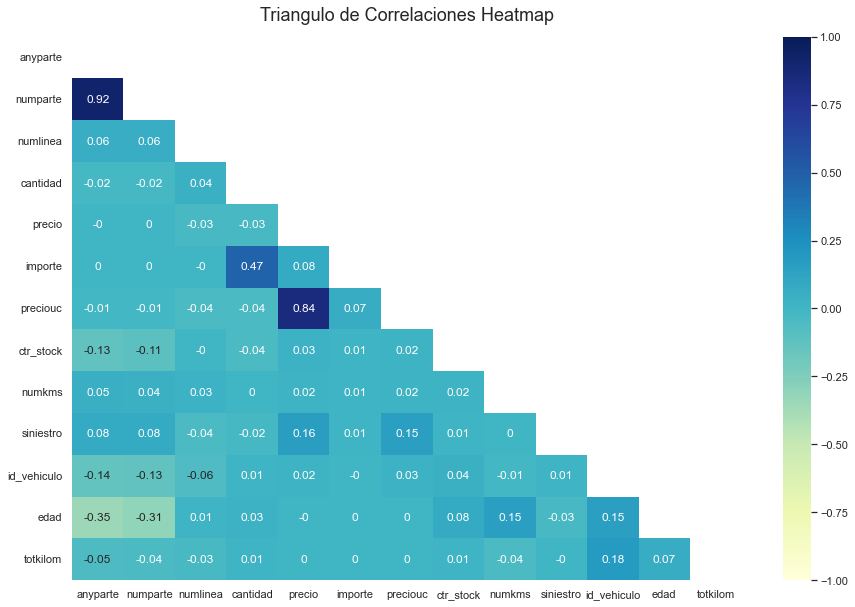

In [94]:
correlaciones(df)

In [95]:
# df.drop(df['totkilom']

In [96]:
df.columns

Index(['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art', 'nomfamia', 'nomunida',
       'codigbus', 'fechaent', 'numkms', 'fechasal', 'siniestro',
       'descripcion', 'cliente', 'id_vehiculo', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'marca',
       'modelo', 'carrocero', 'tipo', 'totkilom', 'dns_vehiculo'],
      dtype='object')

# Graficos

 correlación entre pares

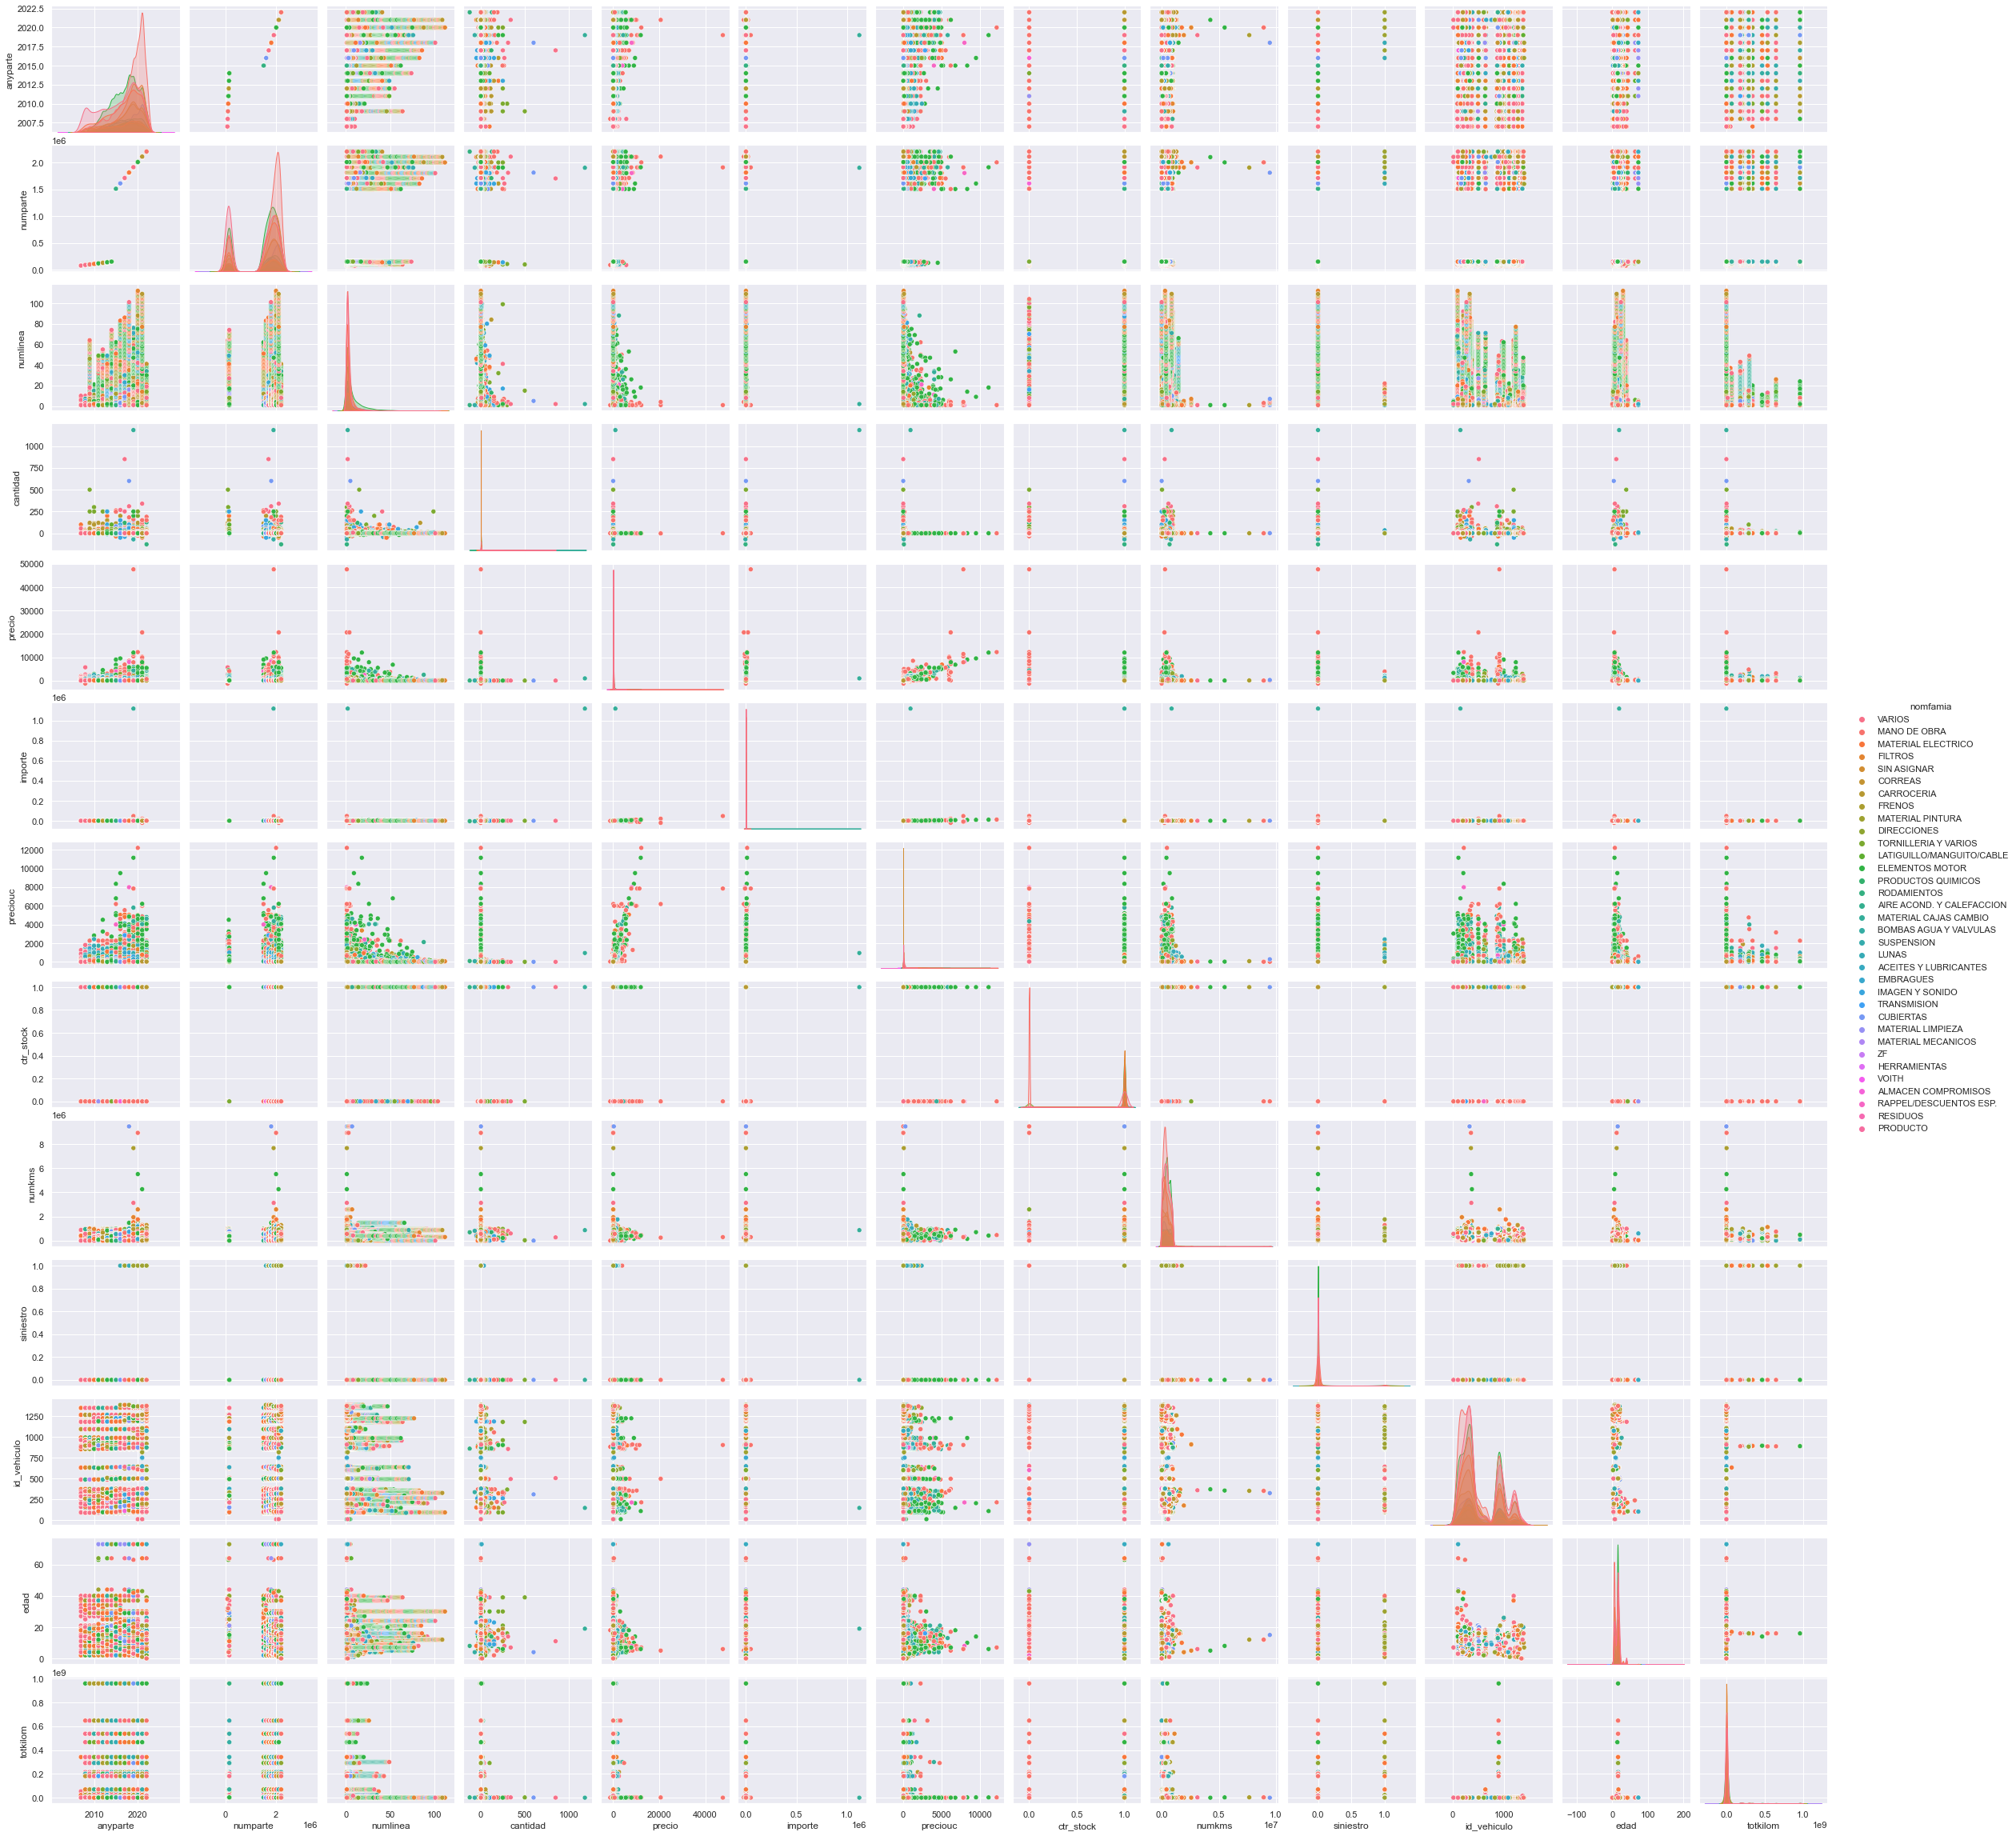

In [113]:
sns.pairplot(df,hue='nomfamia')
plt.show()

Mostramos el número de partes por año

Text(0.5, 0, 'Cantidad de observaciones')

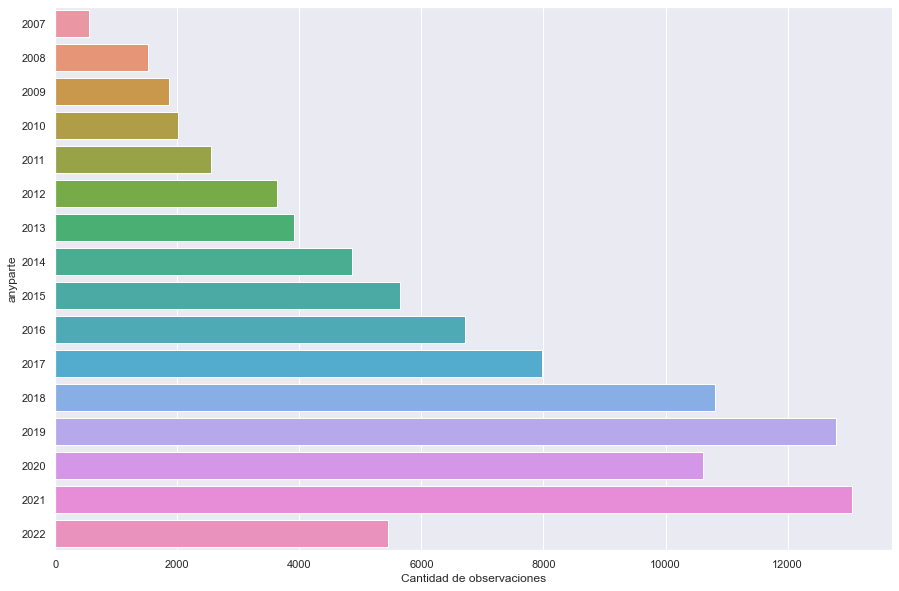

In [98]:
plt.figure(figsize=(15,10))
sns.set(style='darkgrid')

sns.countplot(y='anyparte',data=df)

plt.xlabel('Cantidad de observaciones') 

In [99]:
df1 = df.groupby('nomfamia').precio.mean()
df1

nomfamia
ACEITES Y LUBRICANTES          19.118964
AIRE ACOND. Y CALEFACCION     169.539390
ALMACEN COMPROMISOS             8.666974
BOMBAS AGUA Y VALVULAS        230.382864
CARROCERIA                     82.440000
CORREAS                        44.162388
CUBIERTAS                      94.259361
DIRECCIONES                   193.547326
ELEMENTOS MOTOR               168.494808
EMBRAGUES                     362.566141
FILTROS                        48.284374
FRENOS                        102.248308
HERRAMIENTAS                   34.298119
IMAGEN Y SONIDO               111.915922
LATIGUILLO/MANGUITO/CABLE      67.854622
LUNAS                        1015.566303
MANO DE OBRA                  107.031401
MATERIAL CAJAS CAMBIO         177.979920
MATERIAL ELECTRICO            112.276749
MATERIAL LIMPIEZA               9.780722
MATERIAL MECANICOS            222.418505
MATERIAL PINTURA               78.263223
PRODUCTO                        8.100000
PRODUCTOS QUIMICOS             18.481871
RAPPEL/

Mostramos la media de precios por famila de avería

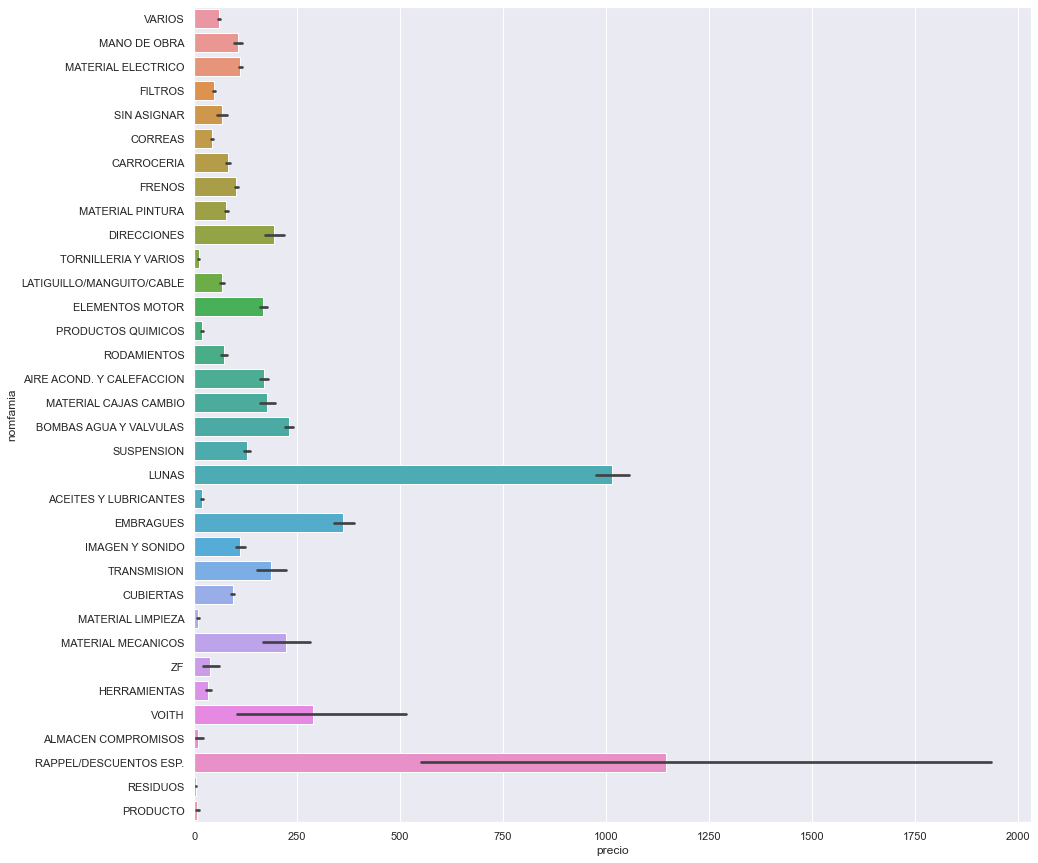

In [100]:
plt.figure(figsize=(15,15))
sns.set(style='darkgrid')

sns.barplot(x='precio',y='nomfamia',data=df)

#plt.xlabel('Cantidad de observaciones') 
plt.show()

In [101]:
df2=df.groupby('siniestro').precio.mean()



media de preciossi es siniestro o no

siniestro
0    107.097081
1    520.287467
Name: precio, dtype: float64


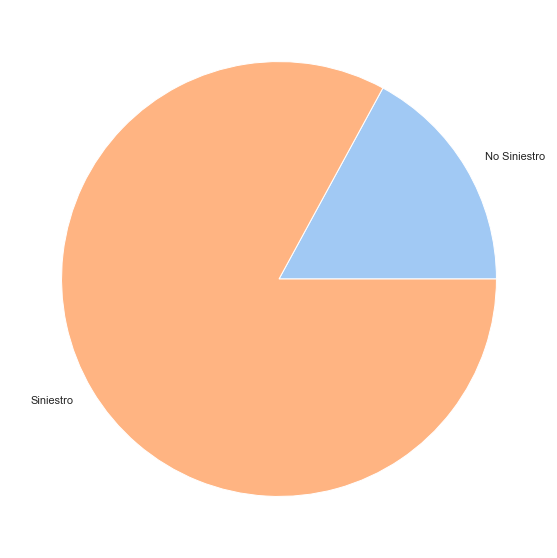

In [102]:
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10,10))
sin=['No Siniestro','Siniestro']
#create pie chart
plt.pie(df2,labels=sin, colors = colors)#, autopct='%.0f%%')
print(df2)
plt.show()

In [103]:
df3=df.groupby('nomempre').precio.sum()
df3

nomempre
Ambulancias Autónomas    8.535500e+02
Ambulancias Edetanas     3.742500e+02
Autos Diamond            4.600494e+05
Buñol                    1.408588e+06
Cave Talleres            1.041935e+05
Escartin                 1.620000e+03
Fernanbus                1.532854e+06
HOSOJU                   4.915019e+05
Herca                    1.261664e+06
J. Aguilar               1.285300e+02
La Concepcion            4.984008e+05
La Hispano Chelvana      5.547825e+05
La Marina Gandiense      6.369135e+05
La Serranica             2.796028e+05
Magallon                 5.975600e+02
Medtrast                 3.160900e+05
NOC RENTING              3.209200e+02
Starbus                  3.356247e+05
Transvia                 1.496218e+06
Transvia Toledo          4.444772e+05
Travicoi                 2.216581e+05
Urbanos de Torrent       2.326408e+05
Viajes Transvia          5.465271e+05
Name: precio, dtype: float64

Gasto total  repartido por las empresas

nomempre
Ambulancias Autónomas    8.535500e+02
Ambulancias Edetanas     3.742500e+02
Autos Diamond            4.600494e+05
Buñol                    1.408588e+06
Cave Talleres            1.041935e+05
Escartin                 1.620000e+03
Fernanbus                1.532854e+06
HOSOJU                   4.915019e+05
Herca                    1.261664e+06
J. Aguilar               1.285300e+02
La Concepcion            4.984008e+05
La Hispano Chelvana      5.547825e+05
La Marina Gandiense      6.369135e+05
La Serranica             2.796028e+05
Magallon                 5.975600e+02
Medtrast                 3.160900e+05
NOC RENTING              3.209200e+02
Starbus                  3.356247e+05
Transvia                 1.496218e+06
Transvia Toledo          4.444772e+05
Travicoi                 2.216581e+05
Urbanos de Torrent       2.326408e+05
Viajes Transvia          5.465271e+05
Name: precio, dtype: float64

Total = 10825681.6274



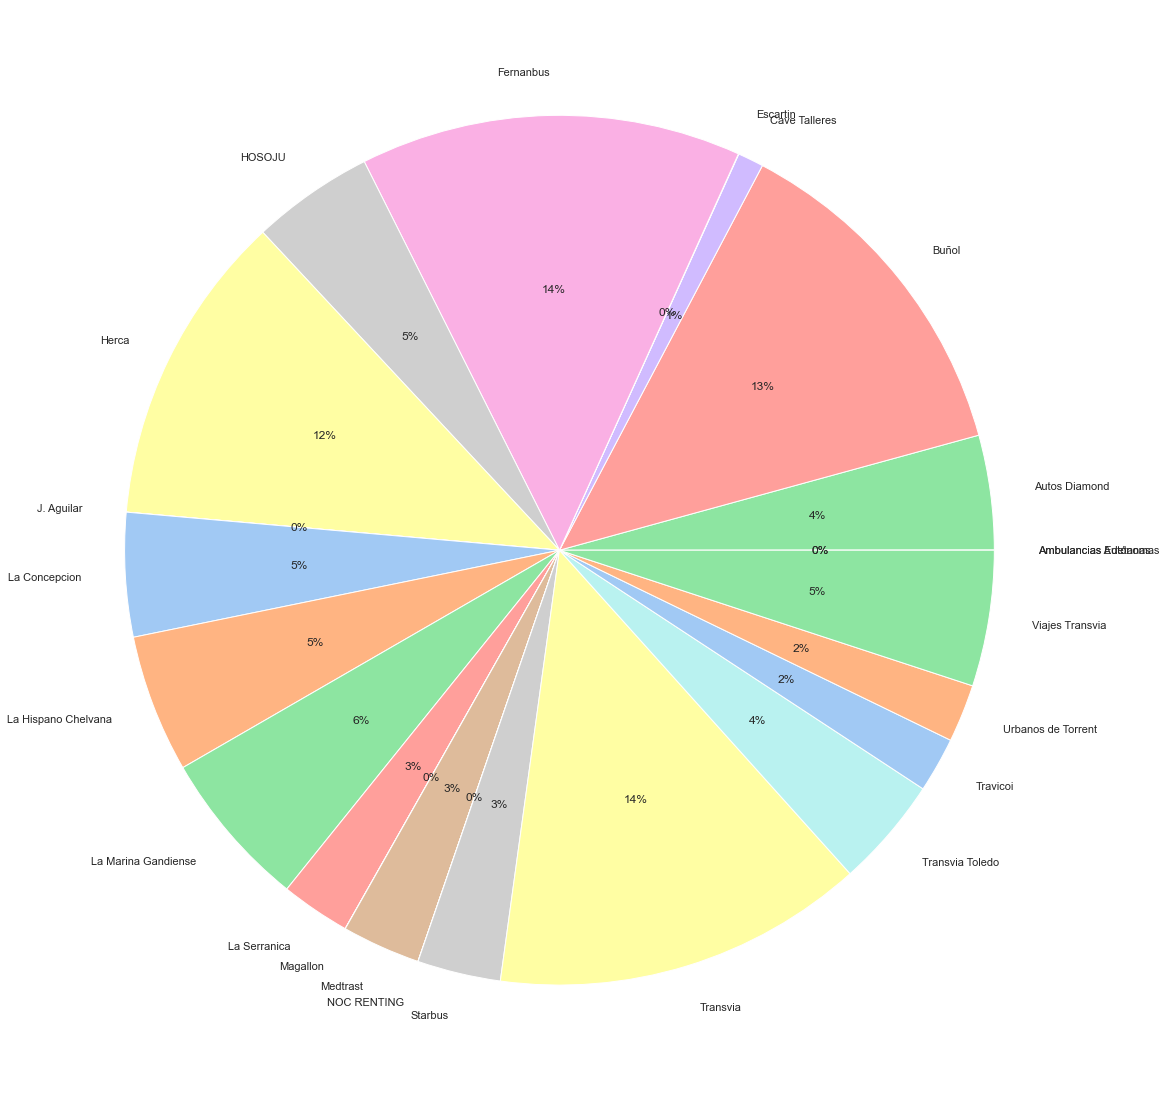

In [104]:
colors = sns.color_palette('pastel')[0:23]
plt.figure(figsize=(20,20))

#create pie chart
plt.pie(df3,labels=df3.index, colors = colors, autopct='%.0f%%')
print(df3)
print(f'\nTotal = {df3.sum()}\n')
plt.show()

Media de los gasto por empresa

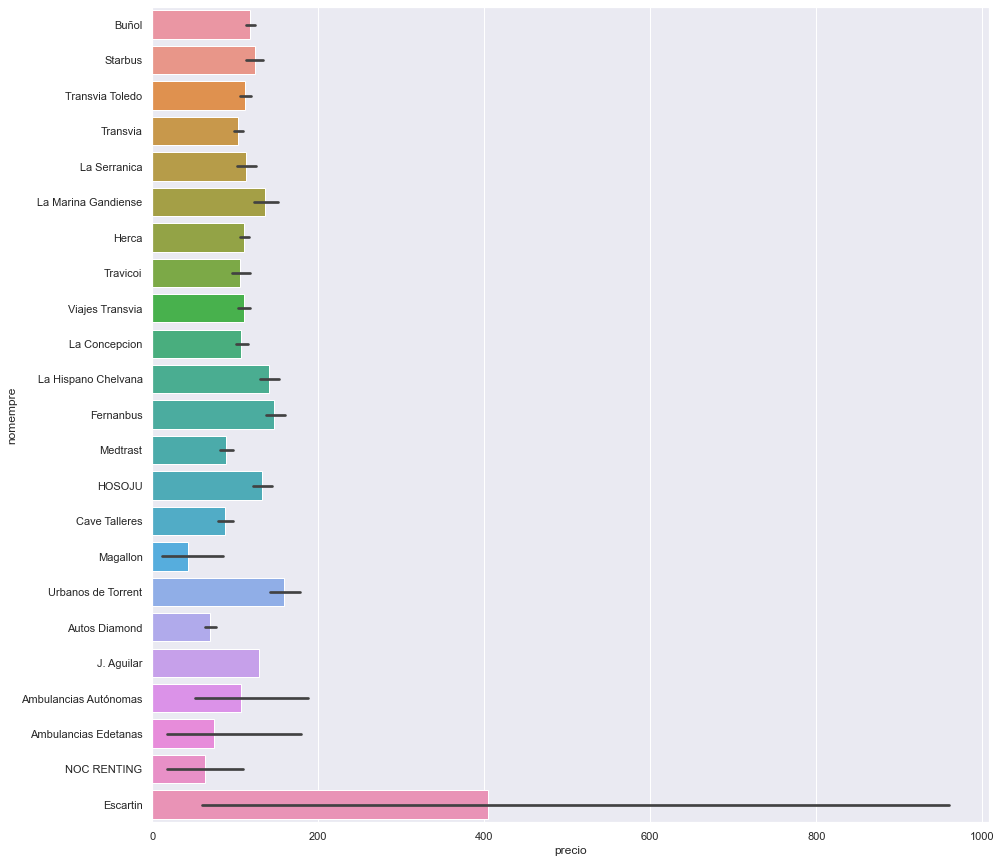

In [105]:
plt.figure(figsize=(15,15))
sns.set(style='darkgrid')

sns.barplot(x='precio',y='nomempre',data=df)

#plt.xlabel('Cantidad de observaciones') 
plt.show()

distibución de 'anyparte'

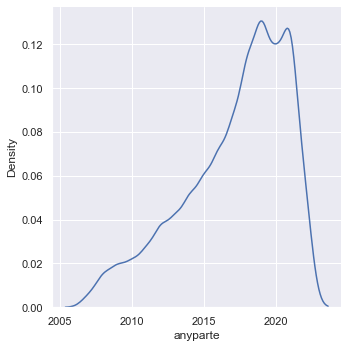

In [115]:
#fig, ax = plt.subplots(figsize=(8, 6))
#sns.displot(df['anyparte'], kde=True, bins=40, rug=True)
sns.displot(df['anyparte'], kind="kde", bw_adjust=1.5)
plt.show()

 relación entre cantidad  e importe

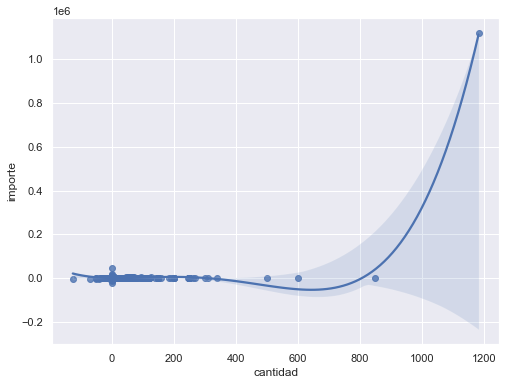

In [107]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="cantidad", y="importe", data=df, order=4)

plt.show()

relación entre preciouc y precio

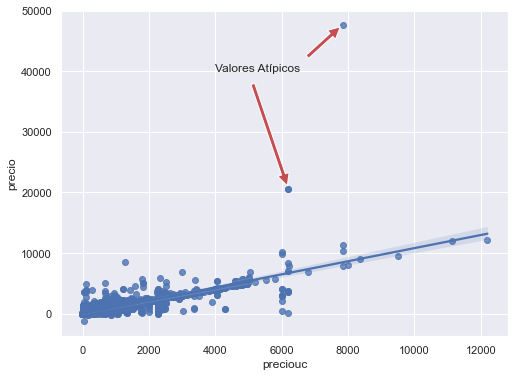

In [119]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="preciouc", y="precio",data=df, order=1)
ax.annotate('Valores Atípicos', xy=(7900, 48000), xytext=(4000, 40000), arrowprops = dict(facecolor='r', shrink=0.1))
ax.annotate('', xy=(6300, 19000), xytext=(5000, 40000), arrowprops = dict(facecolor='r', shrink=0.1))
plt.show()

relación entr epreciuc y la la edad

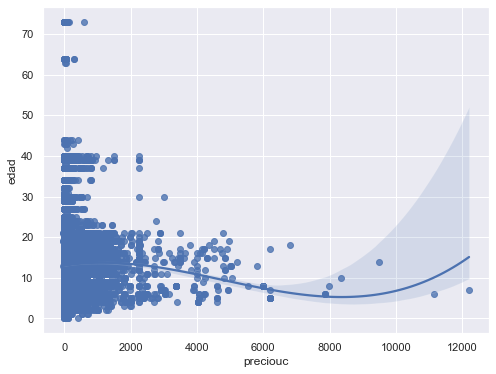

In [109]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="preciouc", y="edad", data=df, order=3)
plt.show()

In [110]:
#sns.pairplot(df, hue='ctr_stock')
#plt.show()

In [111]:
#sns.pairplot(df,hue='nomfamia')
#plt.show()